In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import random_crop
from tensorflow.image import resize
from tensorflow.keras import utils
import numpy as np


from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np


사전 학습 모형을 통한 이미지 분류 - VGG16

In [2]:
# 모델 불러오기 VGG16
model = VGG16(weights='imagenet', include_top=True)


In [3]:
model.layers[0].input_shape

[(None, 224, 224, 3)]

In [4]:
# 이미지 로드, 크기 조정
img_path = 'fish_biyc.png'
img = utils.load_img(img_path)
# img = image.load_img(img_path, target_size=(224, 224))


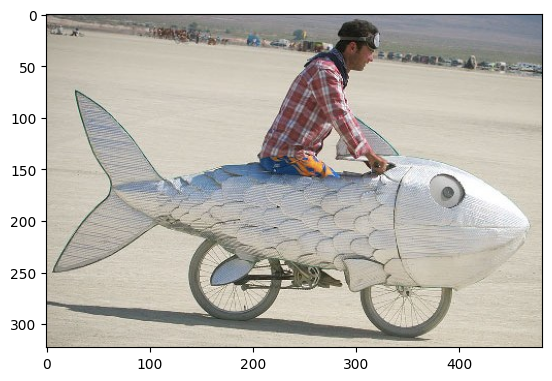

In [5]:
# 원본 이미지
plt.imshow(img)
plt.show()

In [13]:
img = utils.img_to_array(img)

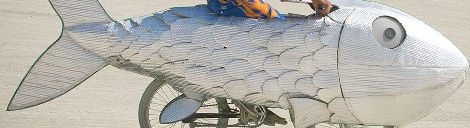

In [14]:
img_croped = tf.image.crop_to_bounding_box(img,140,0,128,470)

utils.array_to_img(img_croped)

### 이미지 패딩

In [16]:
# 목표 크기 설정
target_height = 470
target_width = 470

# 원본 이미지 크기 추출:
source_height = img_croped.shape[0]#
source_width = img_croped.shape[1]

In [17]:
print(source_height, source_width)

128 470


In [18]:
import tensorflow as tf

# Ensure target dimensions are at least as large as source dimensions
target_height = max(target_height, source_height)
target_width = max(target_width, source_width)

# Calculate offsets and ensure they are non-negative
offset_height = max(0, int((target_height - source_height) / 2))
offset_width = max(0, int((target_width - source_width) / 2))

# Apply padding
img_croped_pad = tf.image.pad_to_bounding_box(img_croped, offset_height, offset_width, target_height, target_width)
final_img = utils.array_to_img(img_croped_pad)

In [23]:
target_size = 224
final_img = final_img.resize((target_size, target_size))

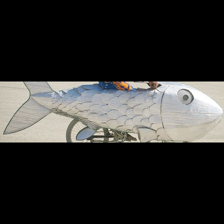

In [24]:
final_img

In [20]:
# img = img.crop((x, y, x+s, y+s))

In [25]:
#  배열로 변환
x = utils.img_to_array(final_img)
# x = dog_vector_crop


In [26]:
# 배치 차원 추가, 모델의 입력 포맷이 여러 개의 샘플을 한 번에 처리할 수 있도록 배치(batch)로 입력받음
x = np.expand_dims(x, axis=0)

In [27]:
# 이미지 전처리 < 1정, re, 배열, 배치 dim  추가 ~4..... 5.기타처리...
x = preprocess_input(x)  # 모델 훈련 시와 동일하게 입력 데이터 스케일링 ex) 픽셀 값 범위 [-1, 1]로 정규화


In [28]:
x.shape

(1, 224, 224, 3)

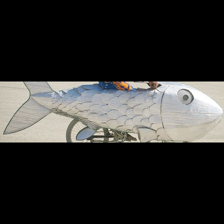

In [29]:
final_img

In [30]:
predictions = model.predict(x)

for i in decode_predictions(predictions, top=10)[0]:
    print('Predicted:', i)

1/1 [==============================] - 0s 23ms/step
Predicted: ('n02641379', 'gar', 0.19656526)
Predicted: ('n03291819', 'envelope', 0.066654116)
Predicted: ('n04376876', 'syringe', 0.057804298)
Predicted: ('n03388183', 'fountain_pen', 0.051411767)
Predicted: ('n03658185', 'letter_opener', 0.047356803)
Predicted: ('n02783161', 'ballpoint', 0.029427284)
Predicted: ('n02786058', 'Band_Aid', 0.029211972)
Predicted: ('n15075141', 'toilet_tissue', 0.02911188)
Predicted: ('n01739381', 'vine_snake', 0.025801916)
Predicted: ('n02514041', 'barracouta', 0.024954744)
